In [10]:
import time
from tqdm import tqdm
import sys
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import warnings
import matplotlib.pyplot as plt
import cProfile
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
warnings.filterwarnings("ignore")

def dropout_layer(X, dropout):
    assert 0<= dropout<= 1
    if dropout == 1:
        return torch.zeros_like(X)
    mask = (torch.randn(X.shape)>dropout).float()
    return mask * X /(1-dropout)

class DropoutMLPScratch(d2l.MulMLPScratch):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, dropouts, sigma=0.01):
        super().__init__(num_inputs, num_outputs, num_hiddens, lr, sigma=0.01)
        self.save_hyperparameters()
        
    def forward(self, X):
        H = X.reshape(-1, self.num_inputs)
        for i in range(len(self.W)-1):
            H = d2l.relu(torch.matmul(H, self.W[i]) + self.b[i])
            if self.training:
                H = dropout_layer(H, self.dropouts[i])
                
        return torch.matmul(H, self.W[-1]) + self.b[-1]
    

class DropoutMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr, dropouts):
        super().__init__()
        self.save_hyperparameters()
        layers = [nn.Flatten()]
        for i in range(len(num_hiddens)):
            layers.append(nn.LazyLinear(num_hiddens[i]))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropouts[i]))
        layers.append(nn.LazyLinear(num_outputs))
        self.net = nn.Sequential(*layers)
    

acc: 0.66


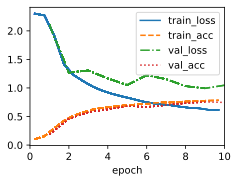

In [12]:
hparams = {'num_outputs':10, 'num_inputs':28*28, 'num_hiddens':[256]*2,
           'dropouts':[0.5]*2,'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
y_hat = model(data.val.data.type(torch.float32)) 
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

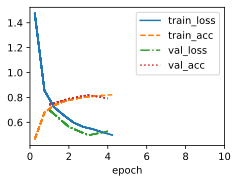

In [ ]:
hparams = {'num_outputs':10,'num_hiddens':[256]*2,
           'dropouts':[0.5]*2,'lr':0.1}
model = DropoutMLP(**hparams)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
y_hat = model(data.val.data.type(torch.float32)) 
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

# 1. What happens if you change the dropout probabilities for the first and second layers? In particular, what happens if you switch the ones for both layers? Design an experiment to answer these questions, describe your results quantitatively, and summarize the qualitative takeaways.

# 2. Increase the number of epochs and compare the results obtained when using dropout with those when not using it.

# 3. What is the variance of the activations in each hidden layer when dropout is and is not applied? Draw a plot to show how this quantity evolves over time for both models.

# 4. Why is dropout not typically used at test time?



# 5. Using the model in this section as an example, compare the effects of using dropout and weight decay. What happens when dropout and weight decay are used at the same time? Are the results additive? Are there diminished returns (or worse)? Do they cancel each other out?



# 6. What happens if we apply dropout to the individual weights of the weight matrix rather than the activations?



# 7. Invent another technique for injecting random noise at each layer that is different from the standard dropout technique. Can you develop a method that outperforms dropout on the Fashion-MNIST dataset (for a fixed architecture)?